In [1]:
import mlrose_hiive

import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


## Simulated Annealing (sa)

Final Hyper Parameters:
* iteration = 1500
* decay_type = exponential
* decay.init_temp = 1.0
* max_attempts = 50

### Flip Flop (input_size=25)

In [2]:
fitness_name = 'flipflop'
alg_name = 'sa'
df_run_stats = pd.read_csv('./output/{0}/{1}__{0}__run_stats_df.csv'.format(fitness_name, alg_name))
df_run_curves = pd.read_csv('./output/{0}/{1}__{0}__curves_df.csv'.format(fitness_name, alg_name))

if ('Unnamed: 0' in df_run_stats.keys()):
        df_run_stats.pop('Unnamed: 0')
        
if ('Unnamed: 0' in df_run_curves.keys()):
        df_run_curves.pop('Unnamed: 0')
        
print(df_run_stats.shape, df_run_curves.shape)

(130, 12) (8187, 5)


In [3]:
df_run_stats.head(1)

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_decay
0,0,12.0,0.000119,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...",exponential,1,0.005,0.001,0.999999,1,2048,NaN


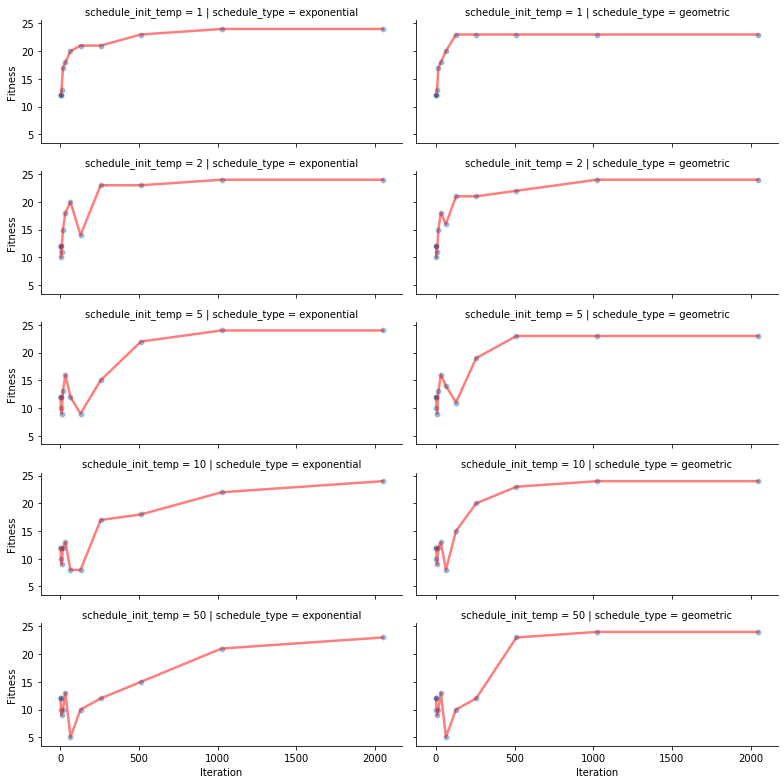

In [4]:
# data = df_run_stats[df_run_stats['schedule_type']==geometric]
grid = sns.FacetGrid(df_run_stats, row='schedule_init_temp', col='schedule_type', size=2.2, aspect=2.5)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)
# grid.add_legend()

In [5]:
for r in df_run_stats['schedule_type'].unique():
    max_f = df_run_stats[df_run_stats['schedule_type']==r]['Fitness'].max()
    print (r, max_f)

exponential 24.0
geometric 24.0


In [6]:
df_run_curves.head()

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000119,12.0,1,2048
1,1,0.000526,12.0,1,2048
2,2,0.003995,12.0,1,2048
3,3,0.007160,12.0,1,2048
4,4,0.007287,13.0,1,2048


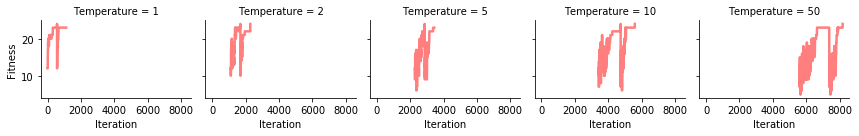

In [7]:
grid = sns.FacetGrid(df_run_curves, col='Temperature', size=2, aspect=1.2)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
# grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)

### Four Peaks (input_size=25)

In [8]:
fitness_name = '4peaks'
alg_name = 'sa'
df_run_stats = pd.read_csv('./output/{0}/{1}__{0}__run_stats_df.csv'.format(fitness_name, alg_name))
df_run_curves = pd.read_csv('./output/{0}/{1}__{0}__curves_df.csv'.format(fitness_name, alg_name))

if ('Unnamed: 0' in df_run_stats.keys()):
        df_run_stats.pop('Unnamed: 0')
        
if ('Unnamed: 0' in df_run_curves.keys()):
        df_run_curves.pop('Unnamed: 0')
        
print(df_run_stats.shape, df_run_curves.shape)

(104, 12) (5473, 5)


In [9]:
df_run_stats.head(1)

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_decay
0,0,2.0,0.00008,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...",exponential,1,0.005,0.001,1.0,1,2048,NaN


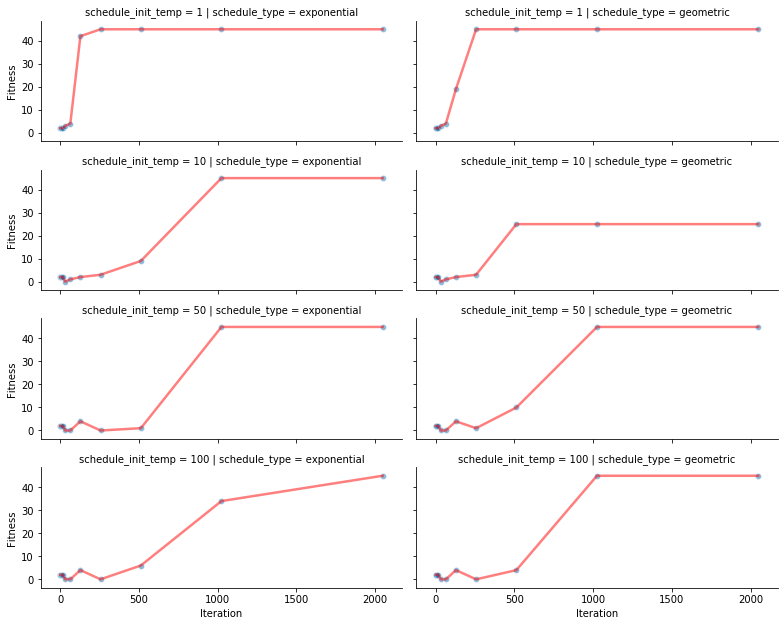

In [10]:
# data = df_run_stats[df_run_stats['schedule_type']==geometric]
grid = sns.FacetGrid(df_run_stats, row='schedule_init_temp', col='schedule_type', size=2.2, aspect=2.5)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)
# grid.add_legend()

In [11]:
for r in df_run_stats['schedule_type'].unique():
    max_f = df_run_stats[df_run_stats['schedule_type']==r]['Fitness'].max()
    print (r, max_f)

exponential 45.0
geometric 45.0


In [12]:
df_run_curves.head()

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000080,2.0,1,2048
1,1,0.000334,2.0,1,2048
2,2,0.003785,2.0,1,2048
3,3,0.006924,2.0,1,2048
4,4,0.006983,2.0,1,2048


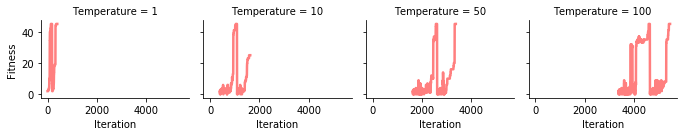

In [13]:
grid = sns.FacetGrid(df_run_curves, col='Temperature', size=2, aspect=1.2)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
# grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)

### Knapsack (input_size=25)

In [14]:
fitness_name = 'knapsack'
alg_name = 'sa'
df_run_stats = pd.read_csv('./output/{0}/{1}__{0}__run_stats_df.csv'.format(fitness_name, alg_name))
df_run_curves = pd.read_csv('./output/{0}/{1}__{0}__curves_df.csv'.format(fitness_name, alg_name))

if ('Unnamed: 0' in df_run_stats.keys()):
        df_run_stats.pop('Unnamed: 0')
        
if ('Unnamed: 0' in df_run_curves.keys()):
        df_run_curves.pop('Unnamed: 0')
        
print(df_run_stats.shape, df_run_curves.shape)

(104, 12) (3230, 5)


In [15]:
df_run_stats.head(1)

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_decay
0,0,75.0,0.00007,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...",exponential,1,0.005,0.001,1.0,1,2048,NaN


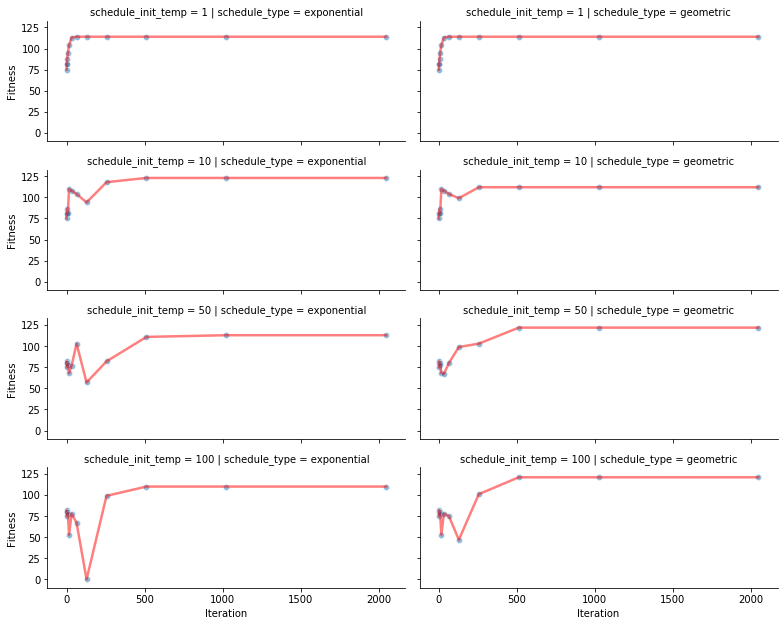

In [16]:
# data = df_run_stats[df_run_stats['schedule_type']==geometric]
grid = sns.FacetGrid(df_run_stats, row='schedule_init_temp', col='schedule_type', size=2.2, aspect=2.5)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)
# grid.add_legend()

In [17]:
for r in df_run_stats['schedule_type'].unique():
    max_f = df_run_stats[df_run_stats['schedule_type']==r]['Fitness'].max()
    print (r, max_f)

exponential 123.0
geometric 122.0


In [18]:
df_run_curves.head()

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000070,82.0,1,2048
1,1,0.000354,82.0,1,2048
2,2,0.003686,88.0,1,2048
3,3,0.006744,88.0,1,2048
4,4,0.006812,88.0,1,2048


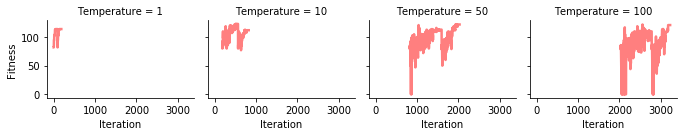

In [19]:
grid = sns.FacetGrid(df_run_curves, col='Temperature', size=2, aspect=1.2)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
# grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)